In [1]:
import requests
import time

SEARCH_URL = "https://api.nal.usda.gov/fdc/v1/foods/search"
DETAILS_URL = "https://api.nal.usda.gov/fdc/v1/food/"
api_key = "zHqK9Qgb4Xc1bl3bzOjaui6peGfWHuqUaU2mHz70"
base_url = "https://api.nal.usda.gov/fdc/v1/foods/search"

def get_food_details(fdc_id):
    response = requests.get(f"{DETAILS_URL}{fdc_id}", params={'api_key': api_key})
    return response.json()

foods = [
    "pizza", "burger", "salad", "steak", "pasta", "taco", "sandwich",
    "soup", "chicken wings", "fried chicken", "sushi", "noodles",
    "curry", "BBQ ribs", "shrimp", "lobster", "crab", "oysters",
    "fish and chips", "ceviche", "risotto", "paella", "tofu",
    "vegan burger", "burrito", "nachos", "dim sum", "spring rolls",
    "gyro", "falafel", "bruschetta", "tapas", "guacamole", "quesadilla",
    "fajitas", "lasagna", "spaghetti", "meatballs", "ramen", "tempura",
    "dumplings", "stir fry", "chow mein", "pho", "clam chowder", "lobster bisque",
    "caesar salad", "pancakes", "waffles", "omelette", "bagel", "croissant"
]
food_ingredients = {}

for food in foods:
    try:
        params = {'query': food, 'api_key': api_key}
        response = requests.get(SEARCH_URL, params=params)

        # Check if the request was successful
        if response.status_code == 200:
            search_response = response.json()
            if search_response['foods']:
                food_id = search_response['foods'][0]['fdcId']
                details = get_food_details(food_id)
                ingredients = details.get('ingredients', "No ingredients listed")
                food_ingredients[food] = ingredients
            else:
                print(f"No food item found for {food}")
        else:
            print(f"Error: Received response {response.status_code} from server")
        time.sleep(5)  # Pauses for 10 seconds between API calls

    except Exception as e:  
        print(f"An error occurred: {e}")
        continue



print(food_ingredients)


{'pizza': "CRUST (WHEAT FLOUR, WATER, SOYBEAN OIL, SUGAR, YEAST, SALT, NON-FAT DRY MILK, CORNMEAL, GRANULATED GARLIC), SAUCE (TOMATOES, WATER, SOYBEAN OIL, SALT, SEASONING [SPICES, GARLIC POWDER, SOYBEAN OIL], ROMANO CHEESE [PASTEURIZED COW'S MILK, CHEESE CULTURE, SALT, ENZYME]), MOZZARELLA CHEESE (CULTURED PASTEURIZED MILK, SALT, ENZYMES), COOKED ITALIAN SAUSAGE (PORK, SPICES, WATER, SALT, SUGAR, DRIED GARLIC, LEMON JUICE, ROSEMARY EXTRACT, SAFFLOWER OIL), ROASTED ONIONS, ROASTED GREEN PEPPERS, MUSHROOMS (MUSHROOMS, WATER, SALT), PARMESAN AND ROMANO CHEESE BLEND (PARMESAN CHEESE [PASTEURIZED PARK SKIM MILK, CHEESE CULTURE, SALT, ENZYMES], ROMANO CHEESE [PASTEURIZED COW'S MILK, CHEESE CULTURES, SALT, ENZYMES]), OREGANO, GRANULATED GARLIC, BASIL.", 'burger': 'WATER, SUGAR, SALT, TOMATO PASTE, SOY PROTEIN CONCENTRATE, VINEGAR, SPICES, CHIPOTLE PEPPER*, HONEY. CONTAINS 2% OR LESS OF EACH OF THE FOLLOWING: GARLIC*, NATURAL SMOKE FLAVOR WITH OTHER NATURAL FLAVOR, CITRIC ACID, FLAVORINGS, PO

In [2]:
import json
# Assuming 'data' is the data you retrieved from the API
with open('foods.json', 'w') as file:
    json.dump(food_ingredients, file, indent=4)

In [3]:
formatted_data = {}

for key, value in food_ingredients.items():
    # Split the ingredients based on commas and trim whitespace
    ingredients = [i.strip() for i in value.split(",")]
    
    # Store the result in the formatted_data dictionary
    formatted_data[key] = ingredients
    
formatted_data


{'pizza': ['CRUST (WHEAT FLOUR',
  'WATER',
  'SOYBEAN OIL',
  'SUGAR',
  'YEAST',
  'SALT',
  'NON-FAT DRY MILK',
  'CORNMEAL',
  'GRANULATED GARLIC)',
  'SAUCE (TOMATOES',
  'WATER',
  'SOYBEAN OIL',
  'SALT',
  'SEASONING [SPICES',
  'GARLIC POWDER',
  'SOYBEAN OIL]',
  "ROMANO CHEESE [PASTEURIZED COW'S MILK",
  'CHEESE CULTURE',
  'SALT',
  'ENZYME])',
  'MOZZARELLA CHEESE (CULTURED PASTEURIZED MILK',
  'SALT',
  'ENZYMES)',
  'COOKED ITALIAN SAUSAGE (PORK',
  'SPICES',
  'WATER',
  'SALT',
  'SUGAR',
  'DRIED GARLIC',
  'LEMON JUICE',
  'ROSEMARY EXTRACT',
  'SAFFLOWER OIL)',
  'ROASTED ONIONS',
  'ROASTED GREEN PEPPERS',
  'MUSHROOMS (MUSHROOMS',
  'WATER',
  'SALT)',
  'PARMESAN AND ROMANO CHEESE BLEND (PARMESAN CHEESE [PASTEURIZED PARK SKIM MILK',
  'CHEESE CULTURE',
  'SALT',
  'ENZYMES]',
  "ROMANO CHEESE [PASTEURIZED COW'S MILK",
  'CHEESE CULTURES',
  'SALT',
  'ENZYMES])',
  'OREGANO',
  'GRANULATED GARLIC',
  'BASIL.'],
 'burger': ['WATER',
  'SUGAR',
  'SALT',
  'TOMATO 

In [4]:
import json

# Assuming 'data' is the data you retrieved from the API
with open('food.json', 'w') as file:
    json.dump(formatted_data, file, indent=4)

In [5]:
# Required Python libraries
import json
import re

# Load the JSON file
with open('food.json', 'r') as fp:
    data = json.load(fp)


# A function to standardize the text
def standardize_text(text):
    standardized_text = text.lower() # convert all to lower case
    standardized_text = re.sub('\(.*?\)', '', standardized_text) # remove words inside parenthesis
    standardized_text = re.sub('[^a-z\s]', '', standardized_text) # remove any character that is not a letter
    standardized_text = re.sub('\s+', ' ', standardized_text).strip() # remove multiple spaces
    return standardized_text

# Iterate over the data dictionary and standardize each ingredient
for key in data:
    ingredients_list = data[key]
    standardized_ingredients_list = [standardize_text(ingredient) for ingredient in ingredients_list]
    data[key] = standardized_ingredients_list
    
    


with open('food.json', 'w') as file:
    json.dump(data, file, indent=4)

In [6]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for getting synonyms from WordNet
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to replace synonyms in a list
def replace_synonyms(wordlist):
    output = []
    for word in wordlist:
        lemma = lemmatizer.lemmatize(word)
        synonyms = get_synonyms(lemma)
        if synonyms:
            output.append(synonyms[0]) # Replace with the first synonym
        else:
            output.append(word) # If no synonym found, keep the original word
    return output


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidchun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Load the JSON file
with open('food.json', 'r') as fp:
    data = json.load(fp)
replace_dict = {
    "mozzarella cheese milk": "cheese",
    "asiago cheese milk": "cheese", 
    "fontal cheese milk": "cheese",
    "emmenthal cheese milk": "cheese",
    "sugar": "sweetener",
    "organic sugar": "sweetener",
    "cane sugar": "sweetener",
    "sucralose": "sweetener",
    "sea salt": "salt",
    "honey contains or less of each of the following garlic": "honey and garlic",
    "natural smoke flavor with other natural flavor": "flavorings",
    "coconut lime dressing filtered water": "dressing",
    "red bell pepper puree red bell peppers": "red bell peppers",
    "crispy thin noodles enriched flour wheat flour": "noodles",
    "folic acid and enzymes": "additives",
    "vegetable oil soybean andor cottonseed oil": "vegetable oil",
    "diced papaya papaya": "papaya",
    "diced mango mango": "mango",
    "diced pineapple pineapple": "pineapple",
    "potassium sorbate and sodium benzoate": "preservatives"
}

# Iterate over the items
for key in data:
    ingredients_list = data[key]
    # Use the custom mapping to replace words
    standardized_ingredients_list = [replace_dict.get(item, item) for item in ingredients_list]
    # Remove duplicates
    standardized_ingredients_list = list(set(standardized_ingredients_list))
    data[key] = standardized_ingredients_list
# Save processed data to a new JSON file
with open('food.json', 'w') as fp:
    json.dump(data, fp, indent=4)

In [8]:
# Load the JSON file
with open('food.json', 'r') as fp:
    data = json.load(fp)

# Process each ingredient list
for key in data:
    ingredients_list = data[key]
    processed_ingredients_list = replace_synonyms(ingredients_list)
    data[key] = processed_ingredients_list

# Iterate over the items
for key in data:
    ingredients_list = data[key]
    # Remove duplicates but keep the order of ingredients
    standardized_ingredients_list = list(dict.fromkeys(ingredients_list))
    data[key] = standardized_ingredients_list


# Save processed data to a new JSON file
with open('food.json', 'w') as fp:
    json.dump(data, fp, indent=4)

In [9]:
# Extract all ingredient names
all_ingredients = [ingredient for ingredients in data.values() for ingredient in ingredients]

# Remove duplicates
unique_ingredients = set(all_ingredients)



In [10]:
# Split compound ingredients and normalize
simplified_ingredients = []
for ingredient in unique_ingredients:
    # Split by common delimiters
    for item in ingredient.split(' and '):
        for sub_item in item.split(' & '):
            simplified_ingredients.append(' '.join(sub_item.lower().split()))

# Remove duplicates
simplified_unique_ingredients = set(simplified_ingredients)
simplified_unique_ingredients


{'additive',
 'al pastor chicken chicken breast with rib meat',
 'amaranth',
 'and less than of carrageenan',
 'and monocalcium phosphate',
 'annatto',
 'annatto coloring potato starch corn starch',
 'annatto vegetable color natural smoke flavor',
 'anticaking agent',
 'ascorbic acid',
 'ascorbic azodicarbonamide',
 'autolyzed yeast extract',
 'baking powder',
 'baking soda',
 'basil',
 'basil soup diced tomatoes tomato',
 'beef',
 'bell peppers',
 'big island deepsea nigari',
 'black pepper',
 'black pepper dough wheat flour',
 'bleached enriched wheat flour wheat flour',
 'bleached wheat flour',
 'boodle',
 'bread crumbs wheat flour',
 'broccoli',
 'bromated wheat flour',
 'brown rice flour',
 'brown sugar',
 'burrito mix burrito rice enriched long grain white rice long grain rice',
 'cabbage',
 'caesar dressing soybean oil',
 'calcium chloride',
 'calcium disodium edta',
 'calcium disodium edta added to protect flavor',
 'calcium propionate',
 'calcium propionate preservative',
 'ca

In [11]:
import json
# List of common descriptors/qualifiers to be removed for deduplication
descriptors = [
    "pasteurized", "cultured", "natural", "enriched", "dried", "dehydrated", "brown", "white",
    "black", "red", "yellow", "green", "roasted", "toasted", "cooked", "uncooked", "fried", 
    "refined", "cracked", "sweetened", "unsweetened"
]

# Remove descriptors from ingredient names for deduplication
deduplicated_ingredients = set()
for ingredient in simplified_unique_ingredients:
    # Split the ingredient into words and remove any descriptor
    words = ingredient.split()
    cleaned_words = [word for word in words if word not in descriptors]
    cleaned_ingredient = ' '.join(cleaned_words)
    
    # If the cleaned ingredient is not trivially short, add it to the set
    if len(cleaned_ingredient) > 2:
        deduplicated_ingredients.add(cleaned_ingredient)

deduplicated_ingredients


{'additive',
 'al pastor chicken chicken breast with rib meat',
 'amaranth',
 'and less than of carrageenan',
 'and monocalcium phosphate',
 'annatto',
 'annatto coloring potato starch corn starch',
 'annatto vegetable color smoke flavor',
 'anticaking agent',
 'ascorbic acid',
 'ascorbic azodicarbonamide',
 'autolyzed yeast extract',
 'baking powder',
 'baking soda',
 'basil',
 'basil soup diced tomatoes tomato',
 'beans',
 'beef',
 'bell peppers',
 'big island deepsea nigari',
 'bleached wheat flour',
 'bleached wheat flour wheat flour',
 'boodle',
 'bread crumbs wheat flour',
 'broccoli',
 'bromated wheat flour',
 'burrito mix burrito rice long grain rice long grain rice',
 'buttermilk',
 'cabbage',
 'caesar dressing soybean oil',
 'calcium chloride',
 'calcium disodium edta',
 'calcium disodium edta added to protect flavor',
 'calcium propionate',
 'calcium propionate preservative',
 'calcium sulfate',
 'cane sugar syrup',
 'canola oil',
 'caramel color',
 'cardamom',
 'carrot',
 '

In [12]:
import json# Read the content of the uploaded file
with open("food.json", "r") as file:
    food_data = json.load(file)

# Display the first few entries for inspection
dict(list(food_data.items())[:5])


{'pizza': ['garlic powder',
  'basil',
  'roasted onions',
  'cheese cultures',
  'romano cheese pasteurized cows milk',
  'oregano',
  'granulated garlic',
  'cornmeal',
  'salt',
  'dried garlic',
  'enzyme',
  'seasoning spices',
  'roasted green peppers',
  'sauce tomatoes',
  'yeast',
  'rosemary extract',
  'crust wheat flour',
  'water',
  'parmesan and romano cheese blend parmesan cheese pasteurized park skim milk',
  'cooked italian sausage pork',
  'lemon juice',
  'cheese culture',
  'soybean oil',
  'sweetening',
  'mushrooms mushrooms',
  'mozzarella cheese cultured pasteurized milk',
  'safflower oil',
  'nonfat dry milk',
  'spice'],
 'burger': ['chipotle pepper',
  'soy protein concentrate',
  'preservative',
  'flavorer',
  'salt',
  'sweetening',
  'vinegar',
  'citric acid',
  'tomato paste',
  'water',
  'honey and garlic',
  'spice'],
 'salad': ['dried coconut',
  'broccoli',
  'lime juice concentrate',
  'xanthan gum',
  'red bell peppers',
  'napa cabbage',
  'no

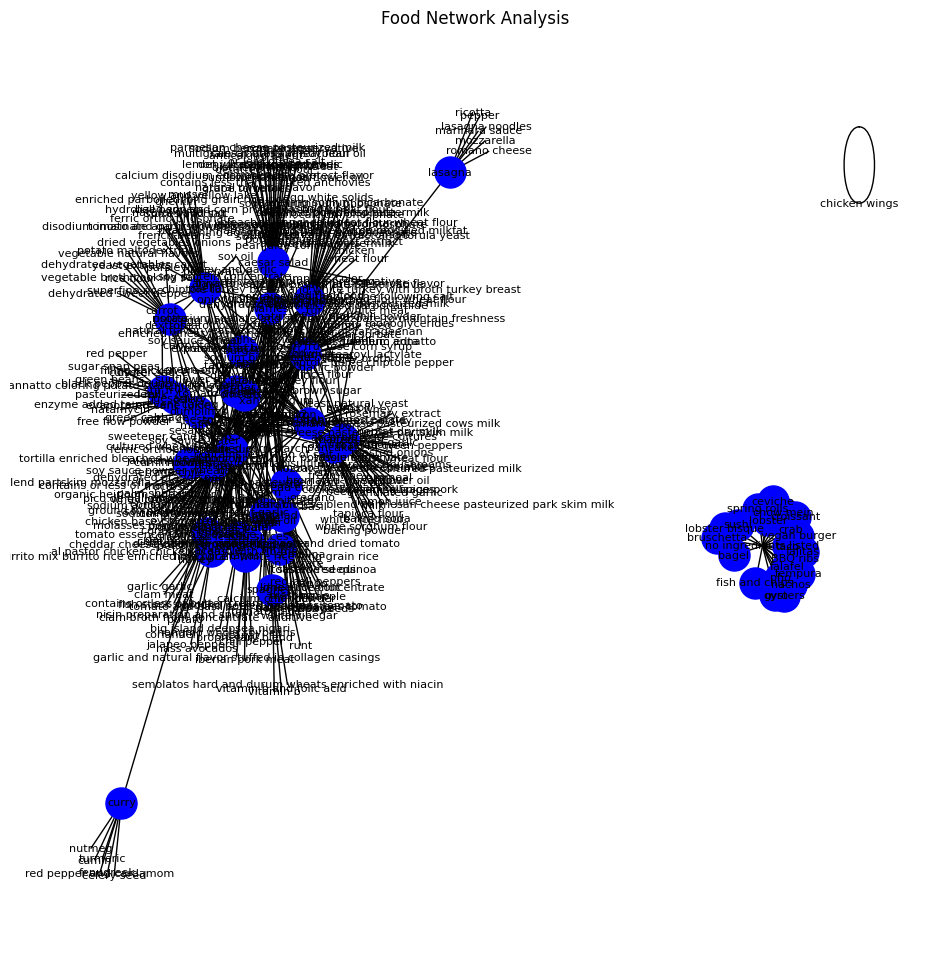

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes and edges to the graph based on the food data
for dish, ingredients in food_data.items():
    for ingredient in ingredients:
        # Add dish and ingredient as nodes (if they aren't already present)
        G.add_node(dish, type='dish')
        G.add_node(ingredient, type='ingredient')
        # Add edge between dish and ingredient
        G.add_edge(dish, ingredient)

# Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Use the spring layout algorithm for positioning nodes
# Draw dish nodes in blue and ingredient nodes in red
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, attr in G.nodes(data=True) if attr['type'] == 'dish'], node_color='blue', node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
plt.title("Food Network Analysis")
plt.axis("off")
plt.show()


In [14]:
# Calculate eigenvector centrality for the graph
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort nodes by eigenvector centrality in descending order
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 nodes based on eigenvector centrality
top_eigenvector_nodes = sorted_eigenvector[:10]
top_eigenvector_nodes


[('burrito', 0.4108867121581934),
 ('sandwich', 0.25158562351768504),
 ('salt', 0.2273264795516142),
 ('meatballs', 0.2108852182705514),
 ('water', 0.2017281822551559),
 ('dim sum', 0.18971349643921237),
 ('caesar salad', 0.18867369993142732),
 ('salad', 0.18001938150647628),
 ('sweetening', 0.1654656218844463),
 ('fried chicken', 0.16318838335046582)]

In [15]:

ingred_eigenvector_centrality = {node: centrality for node, centrality in eigenvector_centrality.items() if G.nodes[node]['type'] == 'ingredient'}

# Sort dishes by eigenvector centrality in descending order
sorted_dish_eigenvector = sorted(ingred_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 dishes based on eigenvector centrality
top_eigenvector_dishes = sorted_dish_eigenvector[:25]
sorted_dish_eigenvector


[('salt', 0.2273264795516142),
 ('water', 0.2017281822551559),
 ('sweetening', 0.1654656218844463),
 ('onion', 0.14924164552953073),
 ('spice', 0.14820559644820486),
 ('niacin', 0.1280001049434542),
 ('vitamin_B2', 0.1280001049434542),
 ('citric acid', 0.12588325738355924),
 ('folic acid', 0.11953879036372078),
 ('enzyme', 0.1131118017969786),
 ('reduced iron', 0.1126148041712844),
 ('wheat gluten', 0.11145609537725489),
 ('xanthan gum', 0.10968812365510734),
 ('natural flavor', 0.10417705714397829),
 ('corn starch', 0.0873662502643551),
 ('dehydrated garlic', 0.0829304260059742),
 ('soybean oil', 0.08043489847342719),
 ('thiamine mononitrate', 0.07768667225296925),
 ('soy', 0.07491352199915277),
 ('cheese culture', 0.07163711303853973),
 ('vinegar', 0.0695323008766257),
 ('modified corn starch', 0.06750046679067608),
 ('maltodextrin', 0.06716432579974572),
 ('celery', 0.061767491907013625),
 ('sodium bicarbonate', 0.06096783763175655),
 ('thiamin mononitrate', 0.058516120513285676),
 

In [16]:
# Calculate eigenvector centrality for the graph
degree_centrality = nx.degree_centrality(G)

# Sort nodes by eigenvector centrality in descending order
sorted_lst = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 nodes based on eigenvector centrality
top_degree_nodes = sorted_lst[:10]
top_degree_nodes


[('burrito', 0.1761658031088083),
 ('sandwich', 0.12176165803108809),
 ('caesar salad', 0.09844559585492228),
 ('meatballs', 0.09585492227979275),
 ('fried chicken', 0.08549222797927461),
 ('dim sum', 0.08549222797927461),
 ('salad', 0.08290155440414508),
 ('pizza', 0.07512953367875648),
 ('paella', 0.06476683937823835),
 ('salt', 0.054404145077720206)]

In [17]:
ingred_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if G.nodes[node]['type'] == 'ingredient'}
ingred_degree_centrality


{'garlic powder': 0.0051813471502590676,
 'basil': 0.0051813471502590676,
 'roasted onions': 0.0025906735751295338,
 'cheese cultures': 0.0025906735751295338,
 'romano cheese pasteurized cows milk': 0.0025906735751295338,
 'oregano': 0.0051813471502590676,
 'granulated garlic': 0.0025906735751295338,
 'cornmeal': 0.0025906735751295338,
 'salt': 0.054404145077720206,
 'dried garlic': 0.0025906735751295338,
 'enzyme': 0.015544041450777202,
 'seasoning spices': 0.0025906735751295338,
 'roasted green peppers': 0.0025906735751295338,
 'sauce tomatoes': 0.0025906735751295338,
 'yeast': 0.007772020725388601,
 'rosemary extract': 0.0025906735751295338,
 'crust wheat flour': 0.0025906735751295338,
 'water': 0.038860103626943004,
 'parmesan and romano cheese blend parmesan cheese pasteurized park skim milk': 0.0025906735751295338,
 'cooked italian sausage pork': 0.0025906735751295338,
 'lemon juice': 0.0025906735751295338,
 'cheese culture': 0.010362694300518135,
 'soybean oil': 0.01036269430051

In [18]:
# Sort dishes by eigenvector centrality in descending order
sorted_dish_degree = sorted(ingred_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 dishes based on eigenvector centrality
top_degree_dishes = sorted_dish_degree[:25]
sorted_dish_degree

[('salt', 0.054404145077720206),
 ('no ingredients listed', 0.054404145077720206),
 ('water', 0.038860103626943004),
 ('onion', 0.03367875647668394),
 ('sweetening', 0.031088082901554404),
 ('spice', 0.02590673575129534),
 ('citric acid', 0.018134715025906738),
 ('niacin', 0.018134715025906738),
 ('vitamin_B2', 0.018134715025906738),
 ('folic acid', 0.018134715025906738),
 ('enzyme', 0.015544041450777202),
 ('xanthan gum', 0.015544041450777202),
 ('reduced iron', 0.01295336787564767),
 ('natural flavor', 0.01295336787564767),
 ('wheat gluten', 0.01295336787564767),
 ('thiamine mononitrate', 0.01295336787564767),
 ('cheese culture', 0.010362694300518135),
 ('soybean oil', 0.010362694300518135),
 ('vinegar', 0.010362694300518135),
 ('corn starch', 0.010362694300518135),
 ('sweet_pepper', 0.010362694300518135),
 ('garlic', 0.010362694300518135),
 ('celery', 0.010362694300518135),
 ('soy', 0.010362694300518135),
 ('dehydrated garlic', 0.010362694300518135),
 ('yeast', 0.007772020725388601)